<a href="https://colab.research.google.com/github/joanglaunes/BME_Math_Advanced/blob/main/Practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BME-Paris Master - UE Math 2 ##
# Practical session 1 : signal and image denoising #

In this session we will use
differential calculus and gradient descent to perform
denoising of signals and images.

We first import the relevent packages :

In [4]:
import numpy as np
import matplotlib.pyplot as plt

We load the test image
`brain.png` and display it:

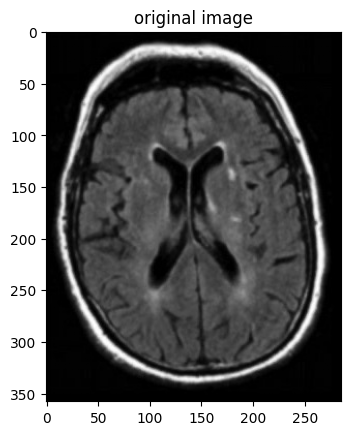

In [8]:
# download the image file from the github repo and save it as "brain.png"
!wget -q https://github.com/joanglaunes/BME_Math_Advanced/blob/main/brain.png?raw=true -O brain.png

# read the image file into the Python session
v_org = plt.imread('brain.png')

# display the image and add a title
plt.imshow(v_org, cmap='gray', vmin=0, vmax=1)
plt.title('original image');

Now we can add noise to simulate a bad acquisition:

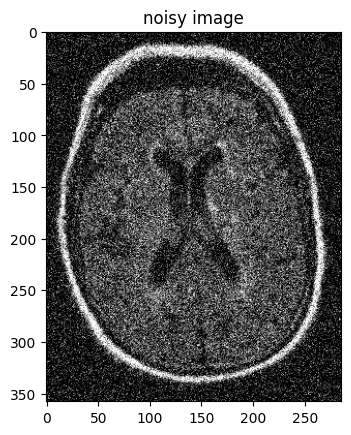

In [13]:
# add random white noise with normal distribution of standard deviation 0.25
v = v_org + 0.25 * np.random.randn(*v_org.shape);

# display the image
plt.imshow(v, cmap='gray', vmin=0, vmax=1)
plt.title('noisy image');

In a first part we will concentrate on denoising a single row of the image. Such a signal can be extracted from the images and plotted as follows:

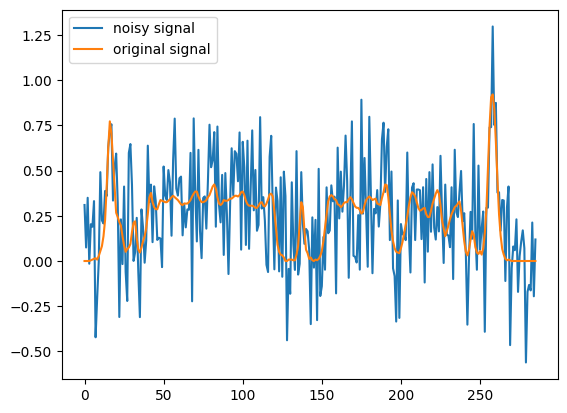

In [14]:
# extract row 150 of the noisy image
y = v[150,:]
# extract row 150 of the original image
y_org = v_org[150,:];

# display the signals
plt.plot(y)
plt.plot(y_org)
plt.legend(('noisy signal','original signal'));

## 1D signal denoising ##

$\newcommand{\R}{{\mathbb R}}$
Let $y=(y_1,y_2,\ldots,y_n)\in\R^n$ be a discrete 1D signal, which we suppose to be noisy. We will first denoise this signal by minimizing the following function:
we define for every $x\in\R^n$,
$$f(x)=\sum_{i=1}^n(x_i-y_i)^2+\alpha\sum_{i=1}^{n-1}(x_{i+1}-x_i)^2,$$
where $\alpha>0$
is a fixed parameter.
Minimization of this function will be performed using the gradient descent algorithm with fixed stepsize.

To go further we need to write the function which will compute the value of the functional and get its gradient.

**Question 1:** Write a function `f(x,y,alpha)`
which computes the value of $f(x)$ for an input vector $x$.  Using vector functions `np.diff` and `np.sum`
,  you can avoid using any loop. This will result in a much more concise and also faster code.

In [ ]:
def f(x,y,alpha):
    ### to do ###
    return np.sum((x-y)**2) + alpha * np.sum(np.diff(x)**2)

# example of use : we compute the value of function f when alpha=0.1 and with x=y_org :
print(f(y_org,y,0.1))

3.222417086033942


Using the automatic differentiation tool `autodiff`, we can avoid to write the expression of the derivatives, and directly compute the gradient of function $f(x)$ as follows :

In [ ]:
from autodiff import grad

g=grad(f)(y_org,y,0.1) # this computes the gradient of f with respect to the first input
g

array([-3.29046100e-02, -3.60770583e-01,  2.13808984e-01,  2.81259000e-01,
        9.03214663e-02, -5.90632036e-02, -2.20846221e-01,  7.36744702e-02,
       -3.51455271e-01, -5.61631322e-02,  1.64415821e-01,  7.06621632e-02,
        3.36192042e-01,  1.23969652e-01, -2.03265011e-01,  1.18047208e-01,
        2.19254643e-01, -4.01187763e-02,  5.87139912e-02,  8.83553773e-02,
       -4.92281795e-01,  4.26019400e-01,  1.15819154e-02,  2.30274886e-01,
       -1.49136499e-01, -1.52616069e-01, -3.26082110e-01,  3.54800858e-02,
        5.66157997e-01,  1.82594866e-01, -1.15597099e-01, -1.31534040e-01,
       -1.98386908e-01,  1.86986446e-01, -1.97094560e-01,  2.52749592e-01,
        2.37326488e-01, -3.08352448e-02, -1.05662815e-01,  8.64891335e-05,
        4.18957531e-01,  1.14135429e-01, -5.44740334e-02, -2.11906821e-01,
       -4.01996598e-02,  1.45692334e-01,  1.36345997e-01,  1.28922641e-01,
       -1.26419410e-01, -1.27563477e-01,  2.16743261e-01,  2.54710903e-03,
       -7.93968588e-02,  

We can now try the gradient descent algorithm and visualize the result.

**Question 2:** Write a script which performs $N=100$ iterations of the gradient descent algorithm on $f$ with $\alpha=5$ and stepsize $\eta=0.01$, and plot the denoised signal `x`. Additionally you can store the sequence of values of the functional at each iteration and plot it in a separate figure. Also try different values for the parameter $\alpha$.

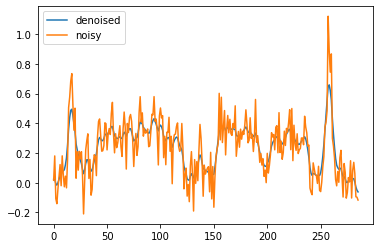

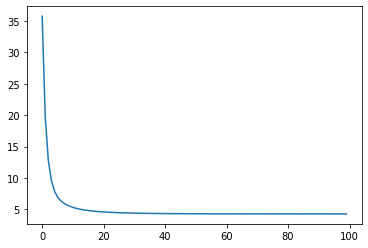

In [ ]:
N = 100
alpha = 5
eta = 0.01
x = y
values_f = np.zeros(N)
for k in range(N):
    values_f[k] = f(x,y,alpha)
    x = x - eta * grad(f)(x,y,alpha)

plt.plot(x)
plt.plot(y)
plt.legend(('denoised','noisy'))
plt.show()

plt.plot(values_f);

**Question 3:** The use of the gradient descent algorithm is in fact not needed here, because the solution can be computed directly by solving $\nabla f(x)=0$. To see this, show first that $f(x)$ can be written in the form $f(x)=\|x-y\|^2+\lambda\|Ax\|^2$, where $A$ is a $(n-1)\times n$ matrix to be found. Deduce that the equation $\nabla J(x)=0$ is a linear system which can be written in matrix form $Mx=b$, for some matrix $M$ and vector $b$. Use Python to solve the system and retrieve the solution found by the gradient descent algorithm.

## Image denoising ##

$\newcommand{\eps}{\varepsilon}$

In this part signals will be 2D grayscale images. $u=(u_{ij})\in\R^{m\times n}$, where $u_{ij}$ gives intensity at pixel $(i,j)$. If $v=(v_{ij})$ is the noisy image, we now define:
\begin{eqnarray*} f(u)&=&\sum_{i=1}^m\sum_{j=1}^n(u_{ij}-v_{ij})^2+\alpha\sum_{i=1}^{m-1}\sum_{j=1}^{n-1}(u_{i+1,j}-u_{ij})^2+(u_{i,j+1}-u_{ij})^2,\\\\ h(u)&=&\sum_{i=1}^m\sum_{j=1}^n(u_{ij}-v_{ij})^2+\alpha\sum_{i=1}^{m-1}\sum_{j=1}^{n-1}\sqrt{\eps^2+(u_{i+1,j}-u_{ij})^2+(u_{i,j+1}-u_{ij})^2},\end{eqnarray*}

**Question 4:** Proceed as in the first part: write functions `f2D`, `h2D`, and write gradient descent algorithms for the two functions. You can use the following parameters : $N=500$, $\alpha=5$, $\eta=0.01$ for $f$, and $N=500$, $\alpha=50$, $\eta=0.01$, $\eps=0.001$ for $h$. Test the algorithms on the noisy image of the brain $v$ and
compare the two approaches.

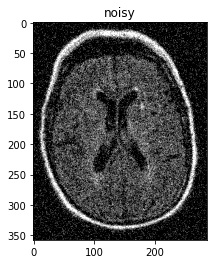

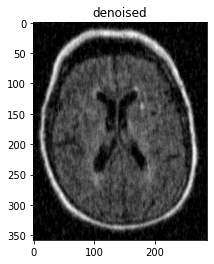

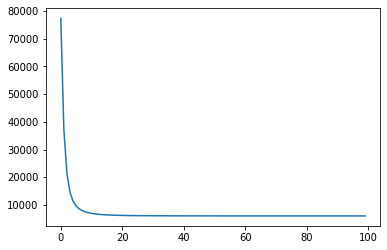

In [ ]:
def f2D(u,v,alpha):
    ### to do ###
    return np.sum((u-v)**2) + alpha * np.sum(np.diff(u,axis=0)**2)+np.sum(np.diff(u,axis=1)**2)

N = 100
alpha = 5
eta = 0.01
v = v_org + .25*np.random.randn(*v_org.shape);
u = v
values_f = np.zeros(N)
for k in range(N):
    values_f[k] = f2D(u,v,alpha)
    u = u - eta * grad(f2D)(u,v,alpha)

plt.imshow(v, cmap='gray', vmin=0, vmax=1)
plt.title('noisy')
plt.show()
plt.imshow(u, cmap='gray', vmin=0, vmax=1)
plt.title('denoised')
plt.show()

plt.plot(values_f);